In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
diccionario_tipos = {
    "tipodepropiedad":"category",
    "provincia":"category",
    "provincia":"category",
    #"habitaciones":"int",
    #"garages":"int",
    #"banos":"int",
    #'metroscubiertos':, 'metrostotales', 'idzona', 'lat', 'lng',
    'gimnasio':"bool",
    'usosmultiples':"bool",
    'piscina':"bool",
    'escuelascercanas':"bool",
    'centroscomercialescercanos':"bool"
}
df = pd.read_csv("data/train.csv", dtype = diccionario_tipos)

In [7]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [8]:
df["habitaciones"].value_counts()

3.0     121887
2.0      57808
4.0      25068
1.0       5069
5.0       4596
6.0       1669
7.0        539
8.0        398
10.0       316
9.0        179
Name: habitaciones, dtype: int64

<Figure size 1080x360 with 0 Axes>

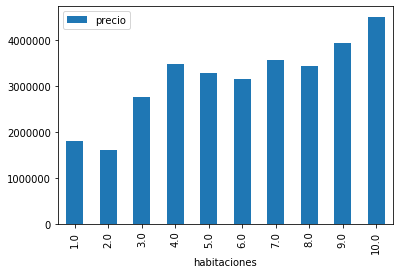

In [24]:
fig = plt.figure(figsize=(15,5))
g =df.groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

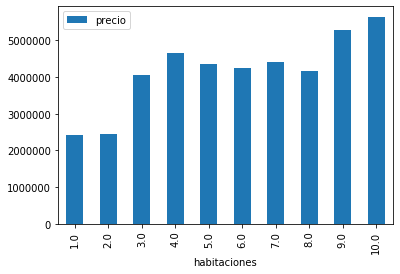

In [29]:
df.loc[df["provincia"] == "Distrito Federal"].groupby("habitaciones").agg({"precio":"mean"}).plot(kind = "bar")

In [80]:
df["cantidad"] = 1
ciudad = df.groupby(["provincia","habitaciones"]).agg({"cantidad":sum})
ciudad.unstack()

cantidad                                           \
habitaciones              1.0      2.0      3.0     4.0     5.0    6.0    
provincia                                                                 
Aguascalientes            18.0    260.0    988.0   225.0    53.0   22.0   
Baja California Norte     48.0   1449.0   1496.0   125.0    26.0    7.0   
Baja California Sur       37.0    621.0    832.0    80.0    11.0    2.0   
Campeche                   6.0     69.0    103.0    21.0     5.0    NaN   
Chiapas                   27.0    230.0    506.0   157.0    25.0   13.0   
Chihuahua                 49.0    527.0   2648.0   536.0    66.0   23.0   
Coahuila                  21.0    455.0   2476.0   342.0    50.0   14.0   
Colima                    31.0    333.0    397.0   107.0    23.0    9.0   
Distrito Federal        2218.0  21062.0  23479.0  5065.0  1118.0  514.0   
Durango                   23.0    407.0   1184.0   307.0    66.0   23.0   
Edo. de México           548.0   9406.0  22200.0  5359.0   859.0  321.0   
Guanajuato                46.0    545.0   1572.0   309.0    83.0   26.0   
Guerrero                 113.0    841.0   1142.0   337.0    71.0   24.0   
Hidalgo                   35.0    699.0   1180.0   286.0    50.0   13.0   
Jalisco                  250.0   4188.0  10492.0  2645.0   586.0  192.0   
Michoacán                 65.0    575.0   1164.0   290.0    74.0   31.0   
Morelos                  123.0   1379.0   4136.0  1048.0   199.0   46.0   
Nayarit                   37.0    426.0    543.0   123.0    21.0   13.0   
Nuevo León               307.0   2986.0   8189.0  1435.0   321.0  104.0   
Oaxaca                    17.0    196.0    259.0    81.0    29.0    4.0   
Puebla                   239.0   1927.0   6010.0  1023.0   149.0   30.0   
Querétaro                186.0   2160.0  10856.0  1530.0   160.0   53.0   
Quintana Roo             158.0   1174.0   2232.0   517.0    73.0   23.0   
San luis Potosí           93.0   1110.0   5136.0   826.0   131.0   44.0   
Sinaloa                   33.0    451.0    837.0   192.0    46.0   13.0   
Sonora                    26.0    766.0   1564.0   312.0    55.0   15.0   
Tabasco                   21.0    179.0    525.0    93.0    18.0    3.0   
Tamaulipas                29.0    605.0   1188.0   175.0    33.0   17.0   
Tlaxcala                   9.0    228.0    444.0    77.0    11.0    1.0   
Veracruz                  94.0   1039.0   3344.0   482.0    81.0   30.0   
Yucatán                  157.0   1475.0   4637.0   931.0    97.0   36.0   
Zacatecas                  2.0     19.0     43.0    13.0     4.0    1.0   

                                                  
habitaciones            7.0    8.0   9.0    10.0  
provincia                                         
Aguascalientes           2.0    5.0   3.0    NaN  
Baja California Norte    NaN    3.0   NaN    1.0  
Baja California Sur      NaN    NaN   NaN    1.0  
Campeche                 1.0    1.0   NaN    1.0  
Chiapas                  4.0    4.0   2.0    3.0  
Chihuahua                4.0    NaN   2.0    2.0  
Coahuila                 1.0    1.0   1.0    2.0  
Colima                   5.0    1.0   NaN    NaN  
Distrito Federal       196.0  142.0  59.0  116.0  
Durango                  6.0    1.0   3.0    1.0  
Edo. de México         107.0   66.0  33.0   58.0  
Guanajuato              12.0    8.0   3.0    5.0  
Guerrero                 4.0    5.0   NaN    2.0  
Hidalgo                  7.0    5.0   1.0    1.0  
Jalisco                 69.0   43.0  24.0   38.0  
Michoacán               15.0   11.0   5.0   18.0  
Morelos                 15.0    6.0   7.0    3.0  
Nayarit                  1.0    1.0   NaN    NaN  
Nuevo León              21.0   24.0   6.0   16.0  
Oaxaca                   3.0    4.0   3.0    2.0  
Puebla                   9.0   15.0   4.0   14.0  
Querétaro               10.0   14.0   8.0    6.0  
Quintana Roo             3.0   11.0   2.0    5.0  
San luis Potosí         13.0    5.0   3.0    7.0  
Sinaloa            